# Prueba de estabilidad en base a rho

Para comenzar con esta parte de la experimentación veremos el comportamiento del clasificador al haber hecho una modificación sobre las funciones de amplificación y difusión (ahora trabajan con los rho's modificados sobre la probabilidad condicional de los casos binarios que se están utilizando).



Para ello se importarán las librerias a utilizar:

In [1]:
import numpy as np
from modules.ternary_classifier import TernaryClassifier
import matplotlib.pyplot as plt

Ahora generamos el ejemplo que sabemos se comportaba mal anteriormente

In [2]:
R = np.array([1, 0, 0])
G = np.array([0, 1, 0])
B = np.array([0, 0, 1])

In [3]:
np.random.seed(42)
idx = np.random.choice(3, size=(10, 10))
x0 = np.array([R, G, B])[idx]


Step 0
Step 100
Step 200
Step 300
Step 400
Step 500
Step 600
Step 700
Step 800
Step 900


Text(0.5, 1.0, 'Imagen final')

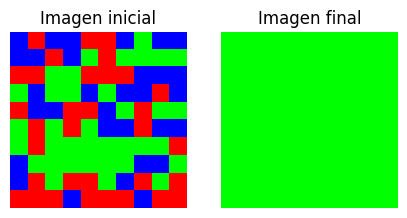

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(5, 5))
axs[0].imshow(x0*255)
axs[0].axis('off')
axs[0].set_title('Imagen inicial')
c = TernaryClassifier(x0, 1e-2, 100, 1)
for i in range(1000):
    if i % 100 == 0:
        #print(f"Step {i}")
    c.alternated_step()
axs[1].imshow(c.grid)
axs[1].axis('off')
axs[1].set_title('Imagen final')

Con esto se puede apreciar de que en efecto, lo que antes afectaba el resultado era la implementación errónea de las funciones que se utilizan para realizar los cambios en cada paso.

Ahora podemos continuar y ver como se comportan los rho con las proporciones de colores y con ello estudiar valores críticos.

In [7]:
np.random.seed(42)
idx = np.random.choice(3, size=(100, 100))
x0 = np.array([R, G, B])[idx]
valores = np.mean(x0, axis=(0, 1))
print(f"Valores medios de R, G, B: {valores}")

Valores medios de R, G, B: [0.3354 0.3347 0.3299]


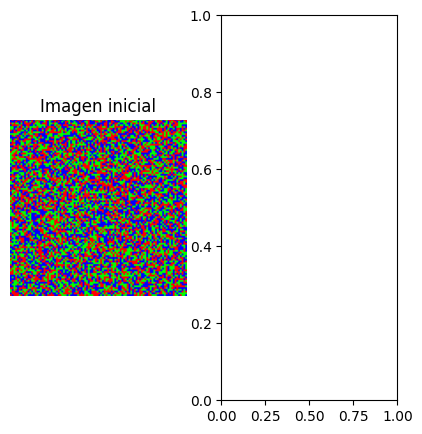

In [35]:
np.random.seed(42)
idx = np.random.choice(3, size=(100, 100))
x0 = np.array([R, G, B])[idx]
fig, axs = plt.subplots(1,2,figsize=(5, 5))
axs[0].imshow(x0*255)
axs[0].axis('off')
axs[0].set_title('Imagen inicial')
c = TernaryClassifier(x0, 1e-2, 100, 1)


In [8]:
for i in range(1000):
    if i % 100 == 0:
        print(f"Step {i}")
    c.alternated_step()
axs[1].imshow(c.grid)
axs[1].axis('off')
axs[1].set_title('Imagen final')

Step 0
Step 100
Step 200
Step 300
Step 400
Step 500
Step 600
Step 700
Step 800
Step 900


Text(0.5, 1.0, 'Imagen final')

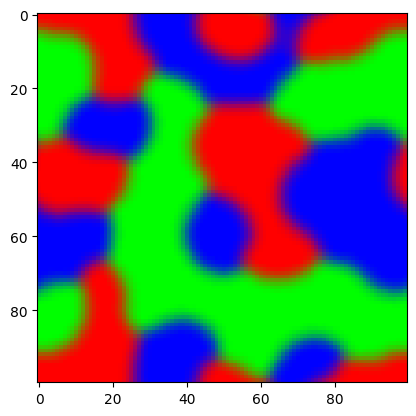

In [76]:
for _ in range(1500):
    c.alternated_step()
plt.imshow(c.grid)

In [78]:
x1 = c.grid
np.mean_x1 = np.mean(x1, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {np.mean_x1}")

Valores medios de R, G, B después de 1500 pasos: [0.31032758 0.37529331 0.31445494]


In [144]:
c.alternated_step()
x2 = c.grid
mean_x2 = np.mean(x2, axis=(0, 1))
print(f"Valores medios de R, G, B después de 1500 pasos: {mean_x2}")
sum_x2 = np.sum(mean_x2)
print(f"Suma de los valores medios de R, G, B después de 1500 pasos: {sum_x2}")

Valores medios de R, G, B después de 1500 pasos: [0.31005418 0.3758733  0.31414812]
Suma de los valores medios de R, G, B después de 1500 pasos: 1.0000755952228524
